In [2]:
!pip install git+https://github.com/Kaggle/learntools.git


  Cloning https://github.com/Kaggle/learntools.git to /tmp/pip-req-build-o97s3huj
  Running command git clone --filter=blob:none --quiet https://github.com/Kaggle/learntools.git /tmp/pip-req-build-o97s3huj
  Resolved https://github.com/Kaggle/learntools.git to commit ca2a51ee0085e4943cadaf5e9fe7dce2ec947d3c
  Preparing metadata (setup.py) ... done


In [3]:
# -- Packages
import numpy as np
import pandas as pd
import os


# -- Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

from learntools.time_series.style import *  # plot style settings
from learntools.time_series.utils import (seasonal_plot,
                                          plot_periodogram,
                                          make_lags,
                                          make_leads,
                                          plot_lags,
                                          make_multistep_target,
                                          plot_multistep)

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
df = pd.read_csv('/content/drive/My Drive/Dataset_PTDLKD/AQI_DaNang_Done.csv')

In [69]:
df['date'] = pd.to_datetime(df['date'])
df = df.dropna()
df = df.sort_values(by='date')
df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   index     1697 non-null   int64         
 1   date      1697 non-null   datetime64[ns]
 2   pm25      1697 non-null   float64       
 3   pm10      1697 non-null   float64       
 4   o3        1697 non-null   float64       
 5   no2       1697 non-null   float64       
 6   so2       1697 non-null   float64       
 7   co        1697 non-null   float64       
 8   year      1697 non-null   float64       
 9   AQI_pm25  1697 non-null   float64       
 10  AQI_pm10  1697 non-null   float64       
 11  AQI_o3    1697 non-null   float64       
 12  AQI_no2   1697 non-null   float64       
 13  AQI_so2   1697 non-null   float64       
 14  AQI_co    1697 non-null   float64       
 15  AQI       1697 non-null   float64       
dtypes: datetime64[ns](1), float64(14), int64(1)
memory usage: 21

In [209]:
df.describe()

index                           date         pm25         pm10  \
count  1697.000000                           1697  1697.000000  1697.000000   
mean    984.695345  2021-09-11 16:41:17.784325120    39.571008    22.056570   
min       0.000000            2019-01-01 00:00:00     1.000000     1.000000   
25%     543.000000            2020-06-27 00:00:00    24.000000    14.000000   
50%    1000.000000            2021-09-27 00:00:00    36.000000    20.000000   
75%    1435.000000            2022-12-06 00:00:00    50.000000    28.000000   
max    1886.000000            2024-03-01 00:00:00   312.000000   448.000000   
std     530.366689                            NaN    24.497830    16.415029   

                o3          no2          so2           co         year  \
count  1697.000000  1697.000000  1697.000000  1697.000000  1697.000000   
mean     55.127283    11.570418    11.706541     3.163229  2021.198586   
min       5.000000     1.000000     1.000000     1.000000  2019.000000   
25%      20.000000    10.000000     6.000000     2.000000  2020.000000   
50%      30.000000    11.000000    12.000000     3.000000  2021.000000   
75%      50.000000    15.000000    13.000000     4.000000  2022.000000   
max     500.000000    50.000000    43.000000    29.000000  2024.000000   
std      88.081111     6.275882     7.771040     2.429645     1.452080   

          AQI_pm25     AQI_pm10       AQI_o3      AQI_no2      AQI_so2  \
count  1697.000000  1697.000000  1697.000000  1697.000000  1697.000000   
mean     75.928165    21.784620    20.545522     5.785209     4.682616   
min       2.000000     1.000000     1.562500     0.500000     0.400000   
25%      48.000000    14.000000     6.250000     5.000000     2.400000   
50%      72.000000    20.000000     9.375000     5.500000     4.800000   
75%     100.000000    28.000000    15.625000     7.500000     5.200000   
max     362.000000   335.000000   225.000000    25.000000    17.200000   
std      38.688016    13.324672    41.164050     3.137941     3.108416   

            AQI_co          AQI  
count  1697.000000  1697.000000  
mean     15.639364    83.178386  
min       5.000000     8.000000  
25%      10.000000    50.000000  
50%      15.000000    74.000000  
75%      20.000000   103.333333  
max      97.500000   362.000000  
std      10.948362    45.835604

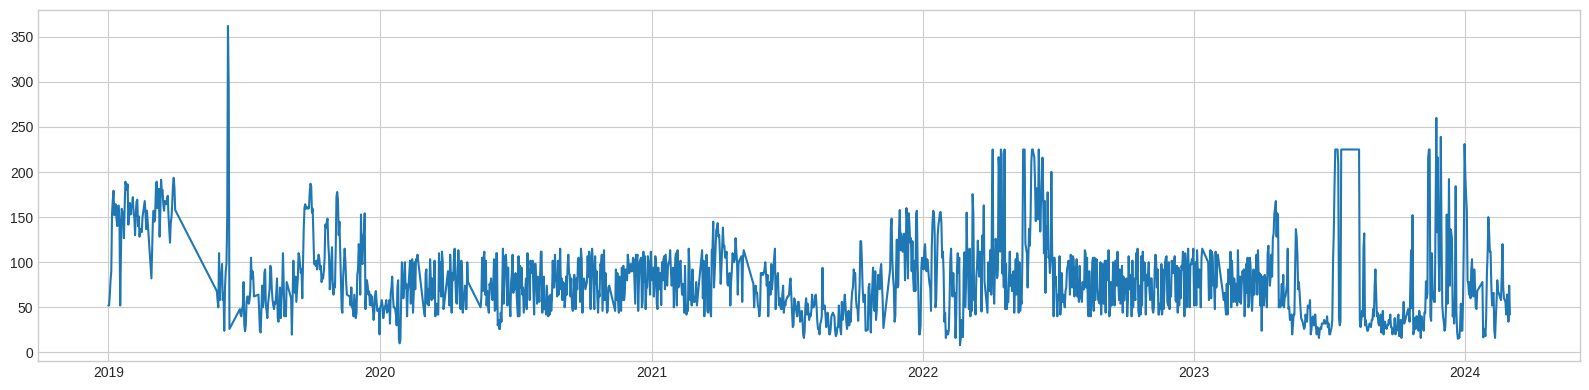

In [210]:
plt.figure(figsize=(24, 6)))))
plt.plot(df['date'], df['AQI'])
plt.legend()
plt.title('Linear apply CalendarFourier and DesterministicProcess 7-2-1 (Dang Nang AQI)', fontsize=25)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7c5357e449a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c5357e46aa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c5357e47100>],
 'medians': [<matplotlib.lines.Line2D at 0x7c5357e46e00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c5357e47400>],
 'means': []}

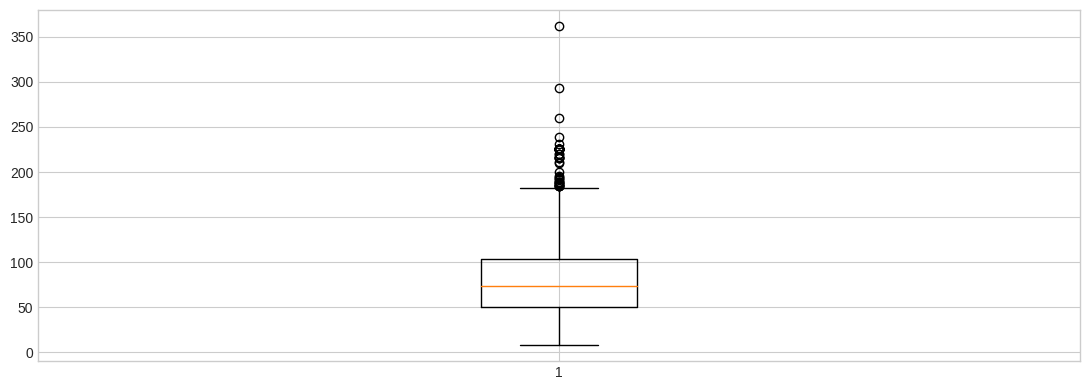

In [211]:
plt.boxplot(df['AQI'])

In [212]:
# Tính các giá trị Q1 (quartile 1), Q3 (quartile 3) và IQR (Interquartile Range)
Q1 = df['AQI'].quantile(0.25)
Q3 = df['AQI'].quantile(0.75)
IQR = Q3 - Q1

# Xác định các giới hạn dưới và trên cho các điểm ngoại lệ
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Đếm các điểm nằm ngoài các giới hạn này
outliers = df[(df['AQI'] < lower_bound) | (df['AQI'] > upper_bound)]
num_outliers = outliers.shape[0]

print(f'Tổng số điểm nhiễu: {num_outliers}')

Tổng số điểm nhiễu: 71


In [70]:
data = df[['date', 'AQI']]
data = data.set_index('date').to_period('D')
data.sort_index()


AQI
date            
2019-01-01  52.0
2019-01-02  52.0
2019-01-03  64.0
2019-01-04  80.0
2019-01-05  90.0
...          ...
2024-02-26  64.0
2024-02-27  64.0
2024-02-28  34.0
2024-02-29  74.0
2024-03-01  42.0

[1697 rows x 1 columns]

In [214]:
# MA
average_AQI = data.groupby('date').mean()['AQI']
average_AQI

trend = average_AQI.rolling(
    window=365,
    center=True,
    min_periods=183,
).mean()

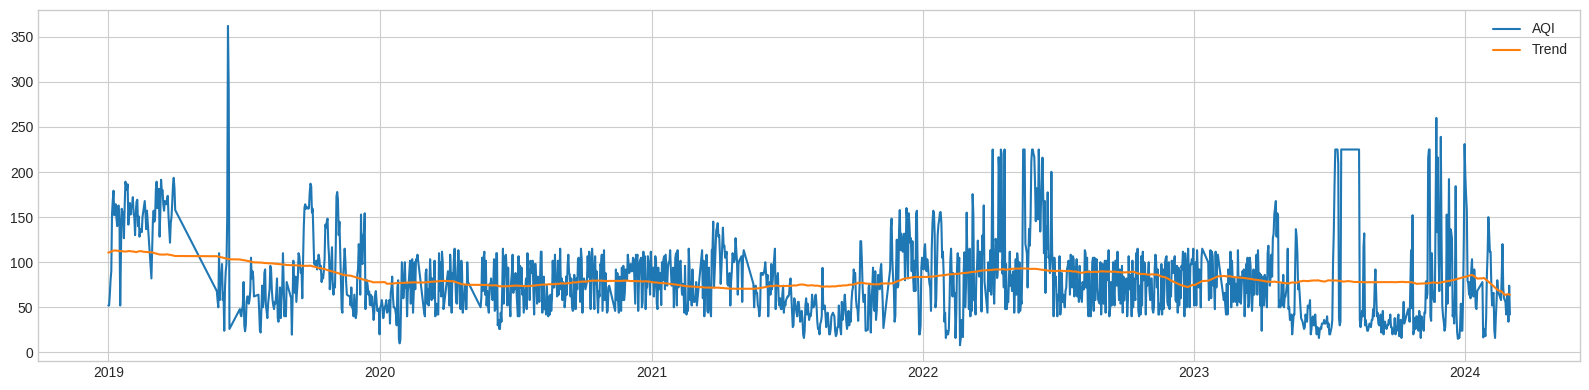

In [215]:
plt.figure(figsize=(24, 6))
plt.plot(df['date'], df['AQI'])
plt.plot(df['date'],trend)

plt.legend(['AQI', 'Trend'])
plt.show()

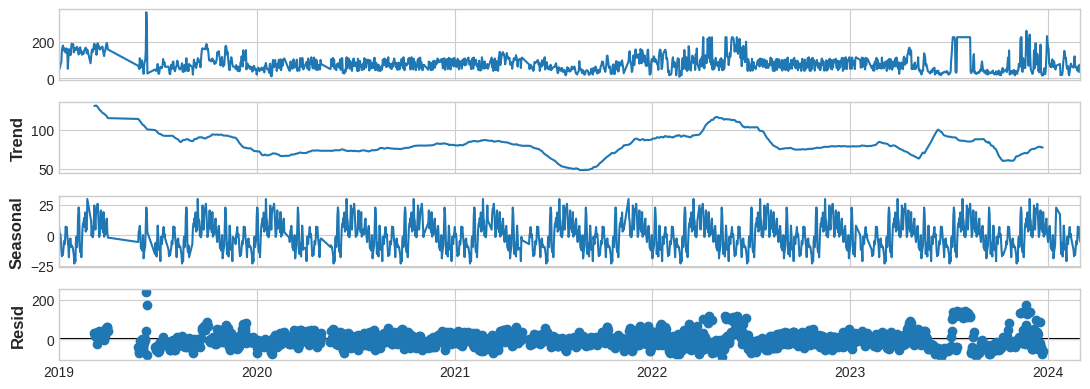

In [216]:
data_temp = df[['date', 'AQI']]
data_temp = data_temp.set_index('date').to_period('D')
data_temp.index = data_temp.index.to_timestamp(freq='D')
data_temp.sort_index()
from statsmodels.tsa.seasonal import seasonal_decompose

# Phân tích thành phần chuỗi thời gian
result = seasonal_decompose(data_temp, model='additive', period=120)

# Vẽ các thành phần
result.plot()
plt.show()


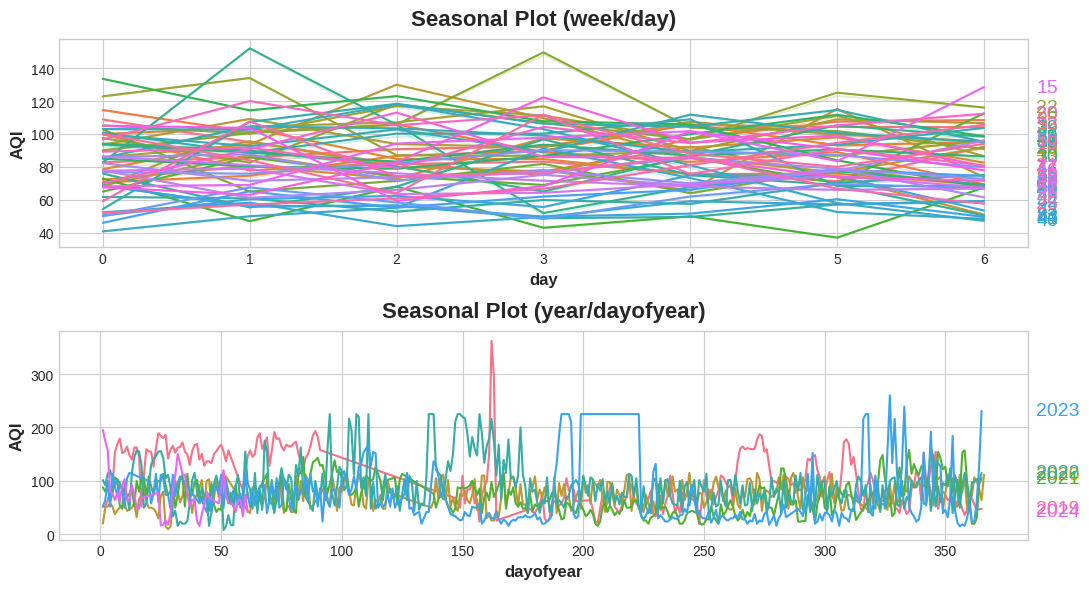

In [217]:
X = data.copy()

# days within a week
X["day"] = X.index.dayofweek  # the x-axis (freq)
X["week"] = X.index.week  # the seasonal period (period)

# days within a year
X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, data['AQI'], period="week", freq="day", ax=ax0)
seasonal_plot(X, data['AQI'], period="year", freq="dayofyear", ax=ax1);

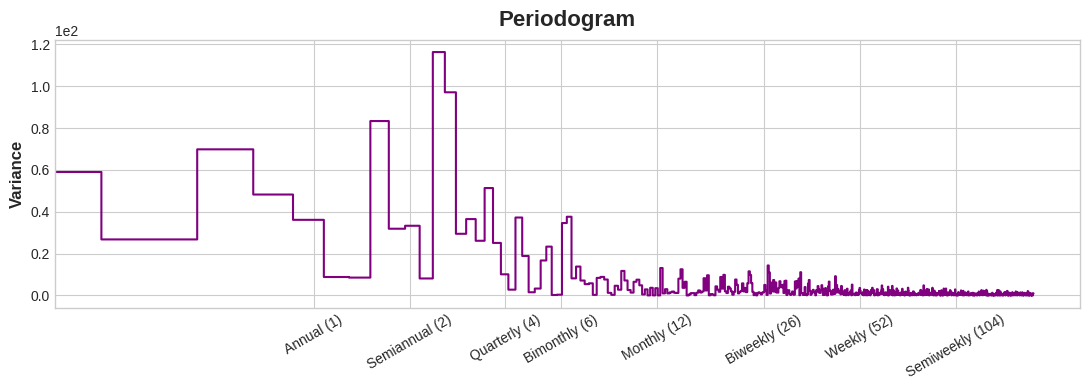

In [218]:
# data_temp = data.loc['2019']
data_temp = data
plot_periodogram(data_temp['AQI']);

In [71]:
#Chia train test 7:2:1
train_size = int(0.7*len(df))
test_size = int(0.2*len(df))
val_size = len(df) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]


In [72]:
#Create training data

y_train = train_data

fourier = CalendarFourier(freq='A', order =365)

dp = DeterministicProcess(
    index=y_train.index,
    constant=True,
    period = None,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)

X_train = dp.in_sample()

In [73]:
# Training the model
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_pred = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y_train.columns)


In [74]:
# -- Preparing the test data
X_test = dp.out_of_sample(steps=len(test_data))
y_test_pred = model.predict(X_test)

# -- Preparing the validate data
X_val = dp.out_of_sample(steps=len(val_data))
y_val_pred = model.predict(X_val)



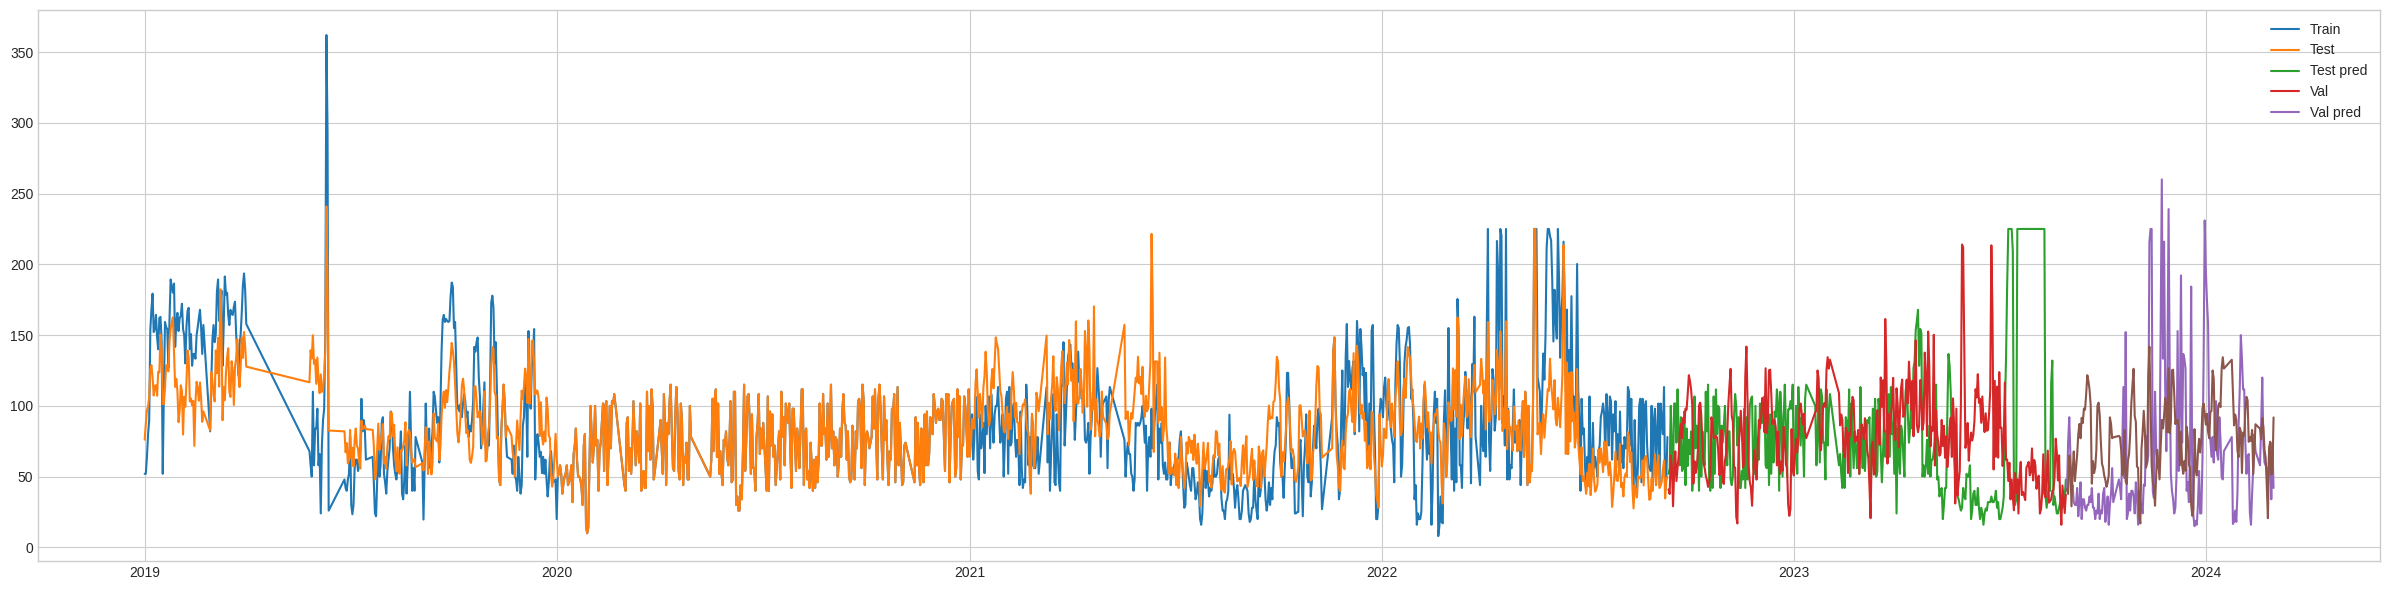

In [75]:
plt.figure(figsize=(24, 6))
plt.plot(train_data.index.to_timestamp(), train_data)
plt.plot(train_data.index.to_timestamp(), y_pred)


plt.plot(test_data.index.to_timestamp(), test_data)
plt.plot(test_data.index.to_timestamp(), y_test_pred)

plt.plot(val_data.index.to_timestamp(),val_data)
plt.plot(val_data.index.to_timestamp(), y_val_pred)
plt.legend(['Train', 'Test', 'Test pred', 'Val', 'Val pred'])
plt.show()

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Tính toán các chỉ số đánh giá (tren tap test)
mse = mean_squared_error(test_data, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, y_test_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
# M, 8

MSE: 4712.84807160694
RMSE: 68.65018624597415
MAE: 48.154819328056696


In [77]:
# Du doan cho 30 ngay trong tuong lai
future_dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=30, freq='D').to_period('D')

X_future = dp.out_of_sample(steps=30)
y_next_30days = model.predict(X_future)

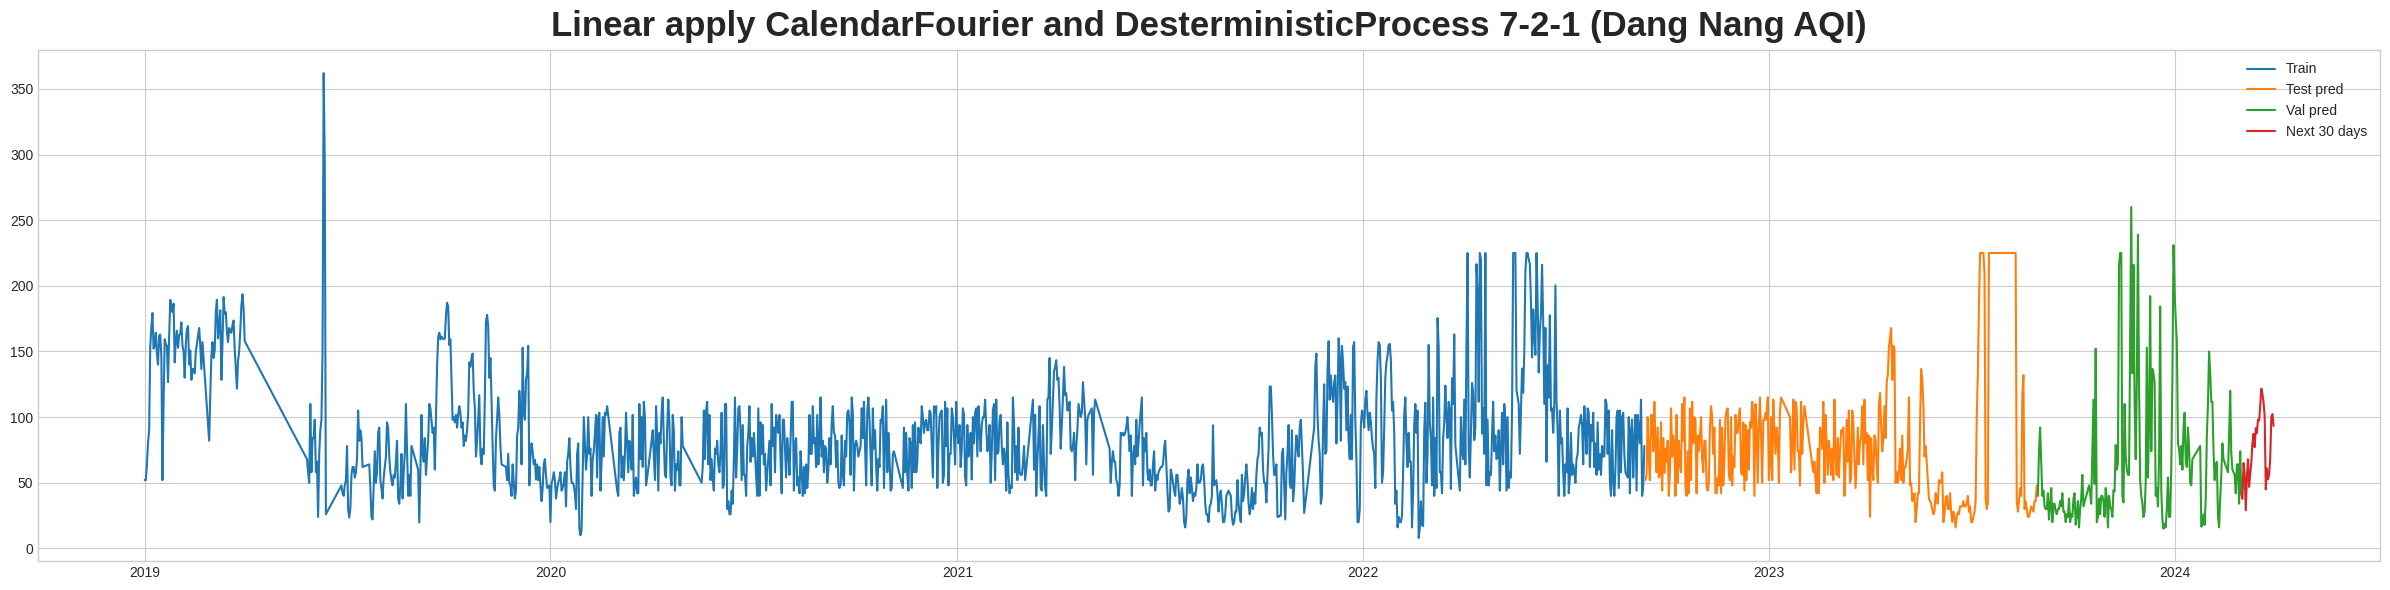

In [78]:
plt.figure(figsize=(24, 6))
plt.plot(train_data.index.to_timestamp(), train_data)

plt.plot(test_data.index.to_timestamp(), test_data)
# plt.plot(test_data.index.to_timestamp(), y_test_pred)

plt.plot(val_data.index.to_timestamp(),val_data)
# plt.plot(val_data.index.to_timestamp(),y_val_pred)

plt.plot(future_dates.to_timestamp(), y_next_30days)
plt.legend(['Train',  'Test pred','Val pred', 'Next 30 days'])
plt.title('Linear apply CalendarFourier and DesterministicProcess 7-2-1 (Dang Nang AQI)', fontsize=25)
plt.show()

8:1:1

In [79]:
# Chia du lieu 8:1:1
train_size = int(0.8*len(df))
test_size = int(0.1*len(df))
val_size = len(df) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]


#Create training data
y_train = train_data
fourier = CalendarFourier(freq='A', order =365)

dp = DeterministicProcess(
    index=y_train.index,
    constant=True,
    period = None,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)

X_train = dp.in_sample()

# Training the model
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_pred = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y_train.columns)

# -- Preparing the test data
X_test = dp.out_of_sample(steps=len(test_data))
y_test_pred = model.predict(X_test)

# -- Preparing the validate data
X_val = dp.out_of_sample(steps=len(val_data))
y_val_pred = model.predict(X_val)


In [80]:
# Tính toán các chỉ số đánh giá (tren tap test)
mse = mean_squared_error(test_data, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, y_test_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

MSE: 7831.227959995426
RMSE: 88.4942255743019
MAE: 63.6050264242727


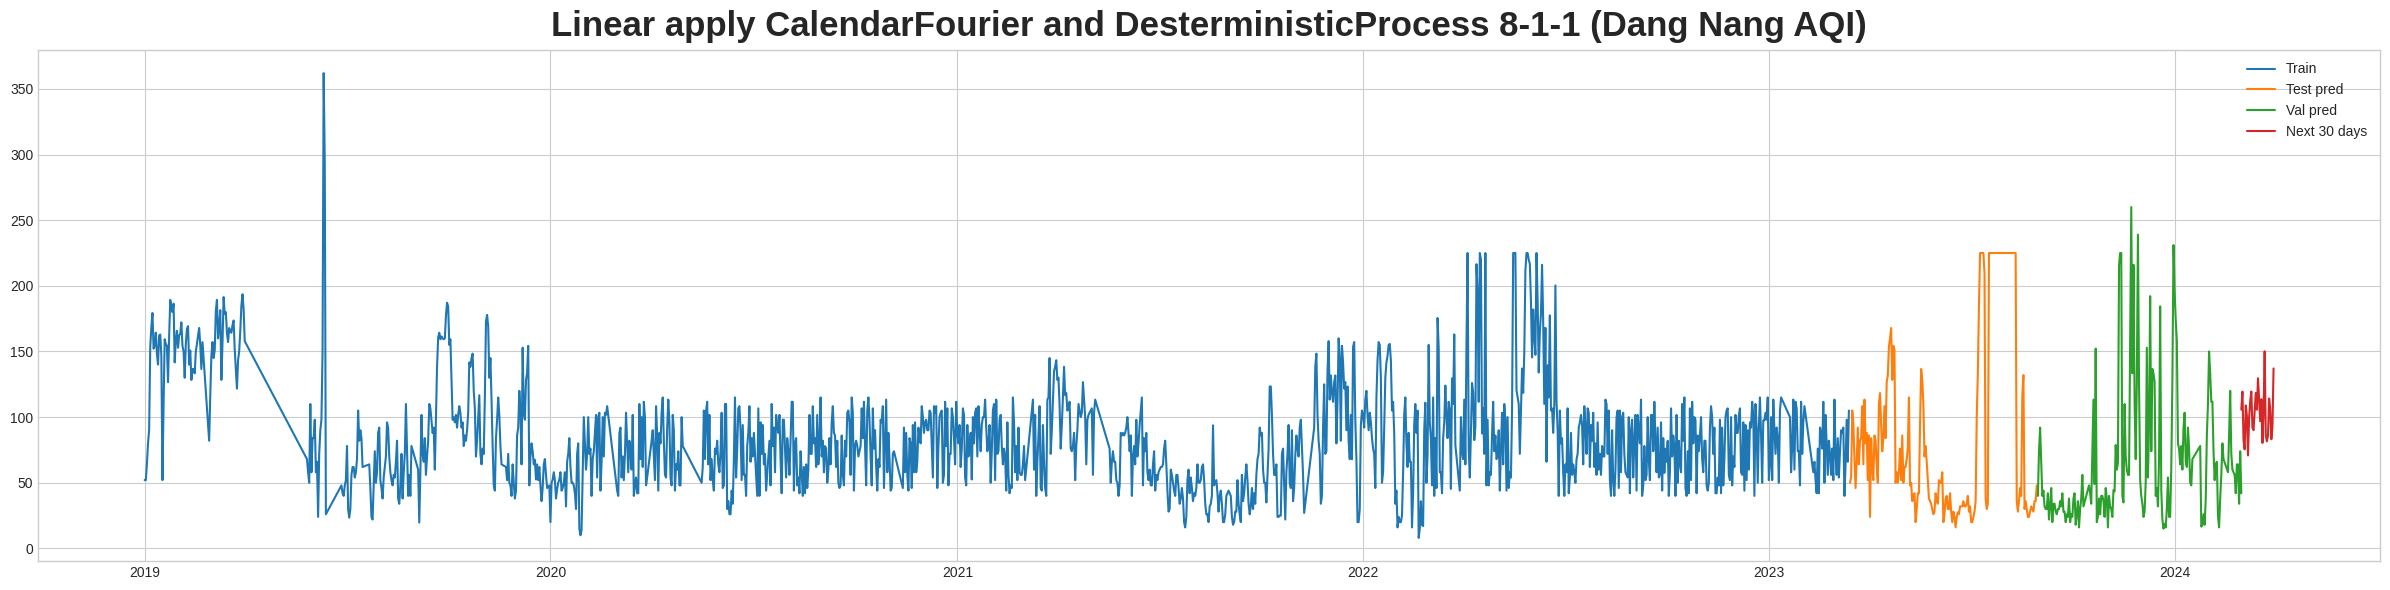

In [81]:
# Du doan cho 30 ngay trong tuong lai
future_dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=30, freq='D').to_period('D')

X_future = dp.out_of_sample(steps=30)
y_next_30days = model.predict(X_future)

# Vẽ dữ liệu
plt.figure(figsize=(24, 6))
plt.plot(train_data.index.to_timestamp(), train_data)

plt.plot(test_data.index.to_timestamp(), test_data)
# plt.plot(test_data.index.to_timestamp(), y_test_pred)

plt.plot(val_data.index.to_timestamp(),val_data)
# plt.plot(val_data.index.to_timestamp(),y_val_pred)

plt.plot(future_dates.to_timestamp(), y_next_30days)
plt.legend(['Train',  'Test pred','Val pred', 'Next 30 days'])
plt.title('Linear apply CalendarFourier and DesterministicProcess 8-1-1 (Dang Nang AQI)', fontsize=25)
plt.show()

6:2:2

In [82]:
# Chia du lieu 6:2:2
train_size = int(0.6*len(df))
test_size = int(0.2*len(df))
val_size = len(df) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]


#Create training data
y_train = train_data
fourier = CalendarFourier(freq='A', order = 365)

dp = DeterministicProcess(
    index=y_train.index,
    constant=True,
    period = None,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)

X_train = dp.in_sample()

# Training the model
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_pred = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y_train.columns)

# -- Preparing the test data
X_test = dp.out_of_sample(steps=len(test_data))
y_test_pred = model.predict(X_test)

# -- Preparing the validate data
X_val = dp.out_of_sample(steps=len(val_data))
y_val_pred = model.predict(X_val)


In [83]:
# Tính toán các chỉ số đánh giá (tren tap test)
mse = mean_squared_error(test_data, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, y_test_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

MSE: 179746.09267440552
RMSE: 423.9647304604541
MAE: 120.6537986478807


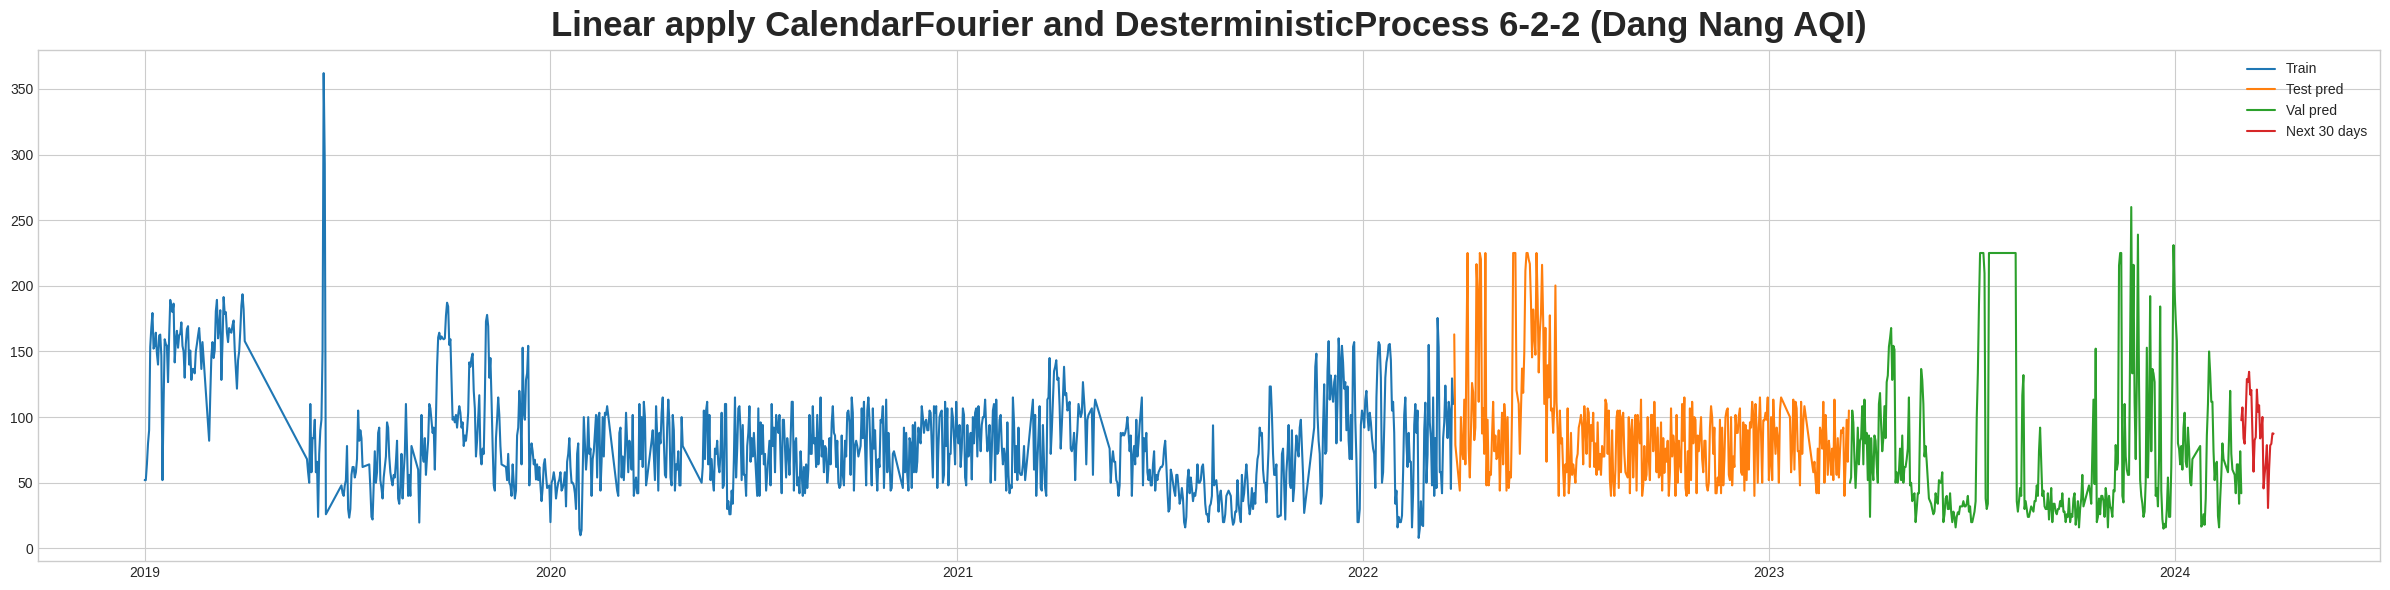

In [84]:
# Du doan cho 30 ngay trong tuong lai
future_dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=30, freq='D').to_period('D')

X_future = dp.out_of_sample(steps=30)
y_next_30days = model.predict(X_future)

# Vẽ dữ liệu
plt.figure(figsize=(24, 6))
plt.plot(train_data.index.to_timestamp(), train_data)

plt.plot(test_data.index.to_timestamp(), test_data)
# plt.plot(test_data.index.to_timestamp(), y_test_pred)

plt.plot(val_data.index.to_timestamp(),val_data)
# plt.plot(val_data.index.to_timestamp(),y_val_pred)

plt.plot(future_dates.to_timestamp(), y_next_30days)
plt.legend(['Train',  'Test pred','Val pred', 'Next 30 days'])
plt.title('Linear apply CalendarFourier and DesterministicProcess 6-2-2 (Dang Nang AQI)', fontsize=25)
plt.show()

## Ha Noi ##

In [85]:
df = pd.read_csv('/content/drive/My Drive/Dataset_PTDLKD/AQI_HaNoi_Done.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.dropna()
df = df.sort_values(by='date')
df = df.reset_index()


data = df[['date', 'AQI']]
data = data.set_index('date').to_period('D')
data.sort_index()


AQI
date                  
2019-05-03  141.666667
2019-05-04  125.000000
2019-05-05  156.428571
2019-05-06  123.333333
2019-05-07   90.000000
...                ...
2024-02-26  120.000000
2024-02-27   94.000000
2024-02-28  154.285714
2024-02-29  108.333333
2024-03-01   92.000000

[1695 rows x 1 columns]

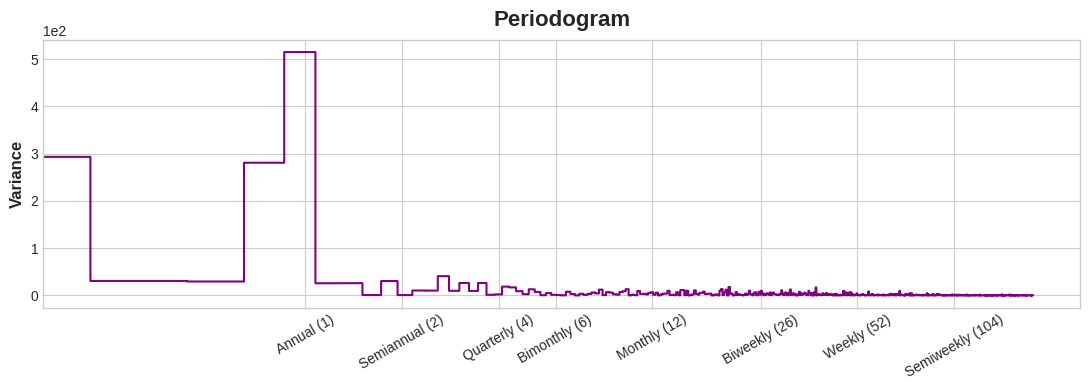

In [86]:
# data_temp = data.loc['2019']
data_temp = data
plot_periodogram(data_temp['AQI']);

7:2:1

In [87]:
# Chia du lieu 7:2:1
train_size = int(0.7*len(df))
test_size = int(0.2*len(df))
val_size = len(df) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]


#Create training data
y_train = train_data
fourier = CalendarFourier(freq='A', order = 365)

dp = DeterministicProcess(
    index=y_train.index,
    constant=True,
    period = None,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)

X_train = dp.in_sample()

# Training the model
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_pred = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y_train.columns)

# -- Preparing the test data
X_test = dp.out_of_sample(steps=len(test_data))
y_test_pred = model.predict(X_test)

# -- Preparing the validate data
X_val = dp.out_of_sample(steps=len(val_data))
y_val_pred = model.predict(X_val)


In [88]:
# Tính toán các chỉ số đánh giá (tren tap test)
mse = mean_squared_error(test_data, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, y_test_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

MSE: 5803.611059059722
RMSE: 76.18143513389415
MAE: 67.03569876391026


In [89]:
# Tính toán các chỉ số đánh giá (tren tap Val)
mse = mean_squared_error(val_data, y_val_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(val_data, y_val_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

MSE: 3408.2228561927236
RMSE: 58.37998677794235
MAE: 48.09516350439942


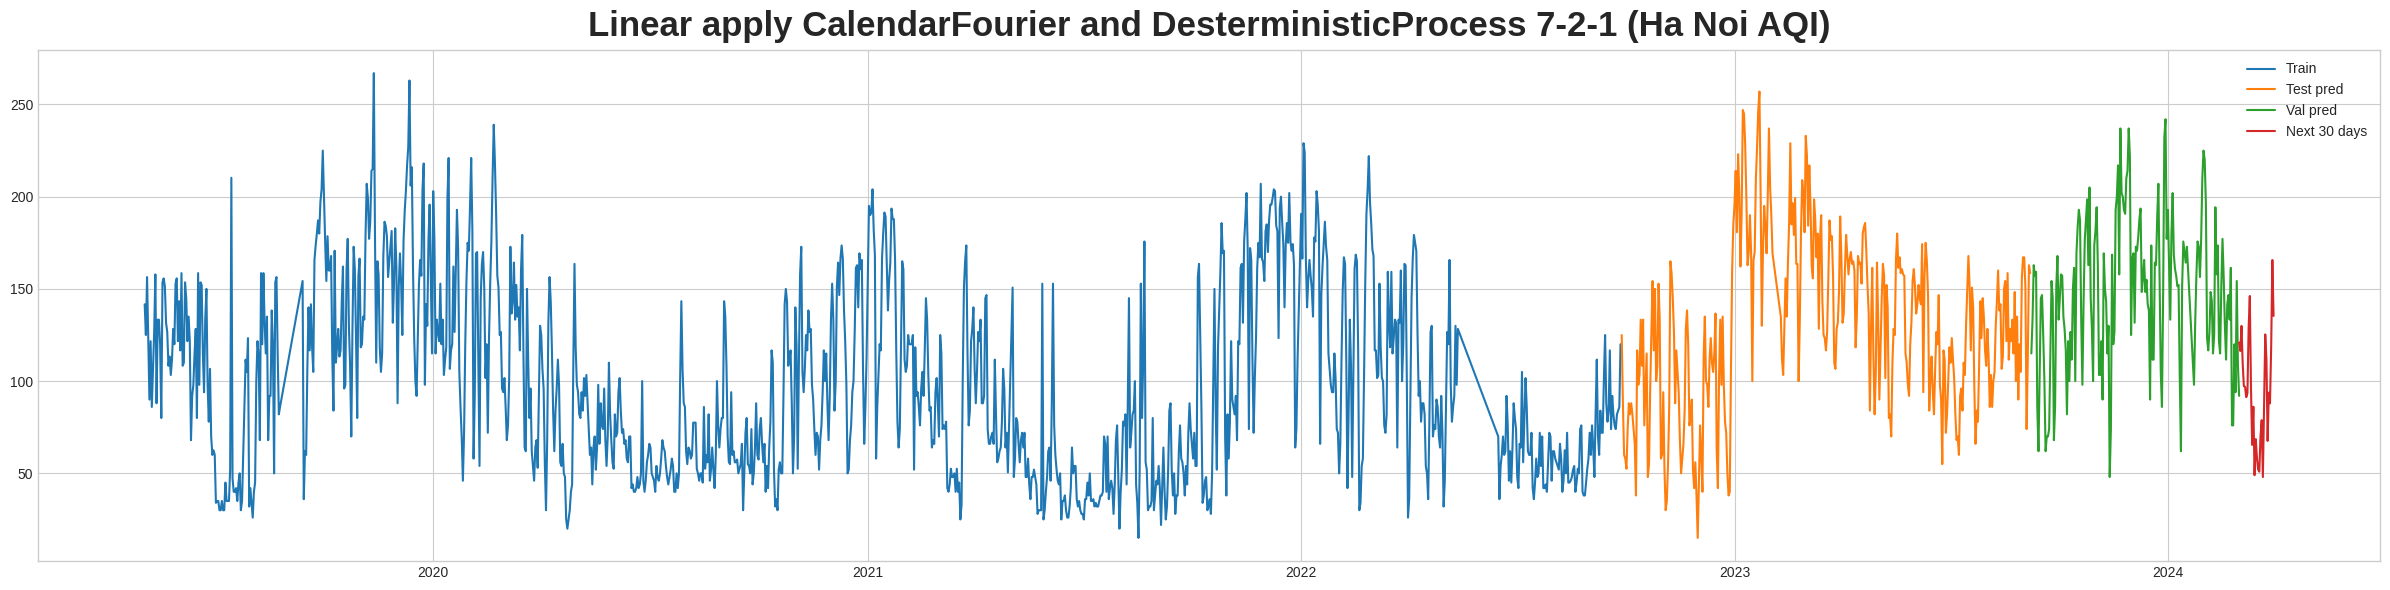

In [90]:
# Du doan cho 30 ngay trong tuong lai
future_dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=30, freq='D').to_period('D')

X_future = dp.out_of_sample(steps=30)
y_next_30days = model.predict(X_future)

# Vẽ dữ liệu
plt.figure(figsize=(24, 6))
plt.plot(train_data.index.to_timestamp(), train_data)

plt.plot(test_data.index.to_timestamp(), test_data)
# plt.plot(test_data.index.to_timestamp(), y_test_pred)

plt.plot(val_data.index.to_timestamp(),val_data)
# plt.plot(val_data.index.to_timestamp(),y_val_pred)

plt.plot(future_dates.to_timestamp(), y_next_30days)
plt.legend(['Train',  'Test pred','Val pred', 'Next 30 days'])
plt.title('Linear apply CalendarFourier and DesterministicProcess 7-2-1 (Ha Noi AQI)', fontsize=25)
plt.show()

8:1:1

MSE: 6210.485022892911
RMSE: 78.8066305769566
MAE: 71.41704854885519


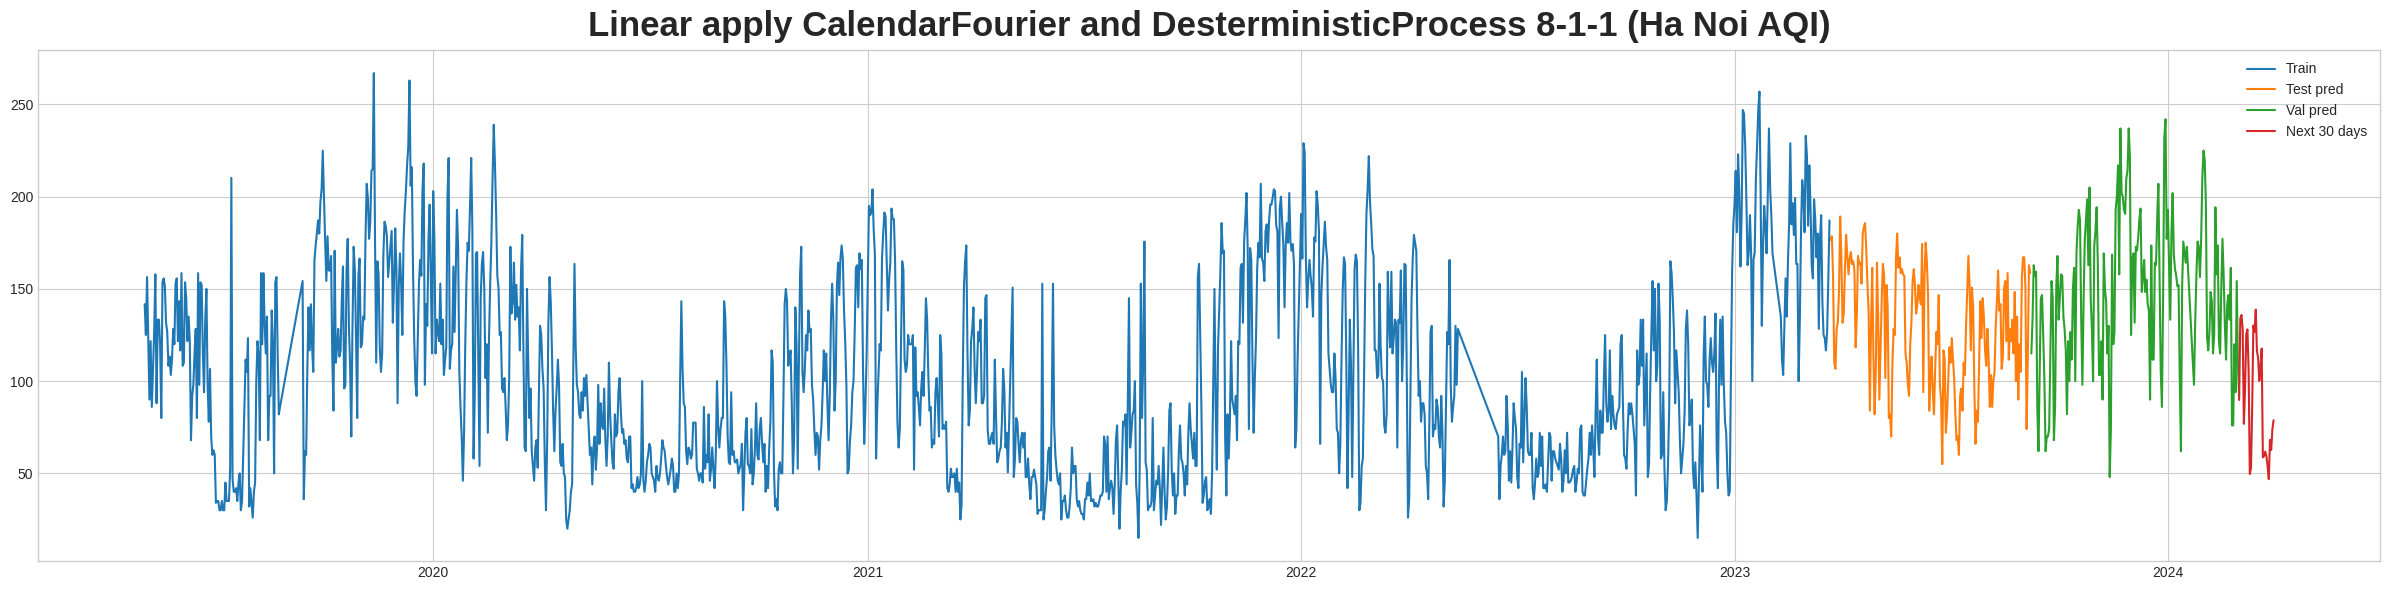

In [91]:
# Chia du lieu 8:1:1
train_size = int(0.8*len(df))
test_size = int(0.1*len(df))
val_size = len(df) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]


#Create training data
y_train = train_data
fourier = CalendarFourier(freq='A', order = 365)

dp = DeterministicProcess(
    index=y_train.index,
    constant=True,
    period = None,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)

X_train = dp.in_sample()

# Training the model
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_pred = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y_train.columns)

# -- Preparing the test data
X_test = dp.out_of_sample(steps=len(test_data))
y_test_pred = model.predict(X_test)

# -- Preparing the validate data
X_val = dp.out_of_sample(steps=len(val_data))
y_val_pred = model.predict(X_val)

# Tính toán các chỉ số đánh giá (tren tap test)
mse = mean_squared_error(test_data, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, y_test_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Du doan cho 30 ngay trong tuong lai
future_dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=30, freq='D').to_period('D')

X_future = dp.out_of_sample(steps=30)
y_next_30days = model.predict(X_future)

# Vẽ dữ liệu
plt.figure(figsize=(24, 6))
plt.plot(train_data.index.to_timestamp(), train_data)

plt.plot(test_data.index.to_timestamp(), test_data)
# plt.plot(test_data.index.to_timestamp(), y_test_pred)

plt.plot(val_data.index.to_timestamp(),val_data)
# plt.plot(val_data.index.to_timestamp(),y_val_pred)

plt.plot(future_dates.to_timestamp(), y_next_30days)
plt.legend(['Train',  'Test pred','Val pred', 'Next 30 days'])
plt.title('Linear apply CalendarFourier and DesterministicProcess 8-1-1 (Ha Noi AQI)', fontsize=25)
plt.show()

MSE: 43122.14125499736
RMSE: 207.65871340976125
MAE: 62.64280985588129


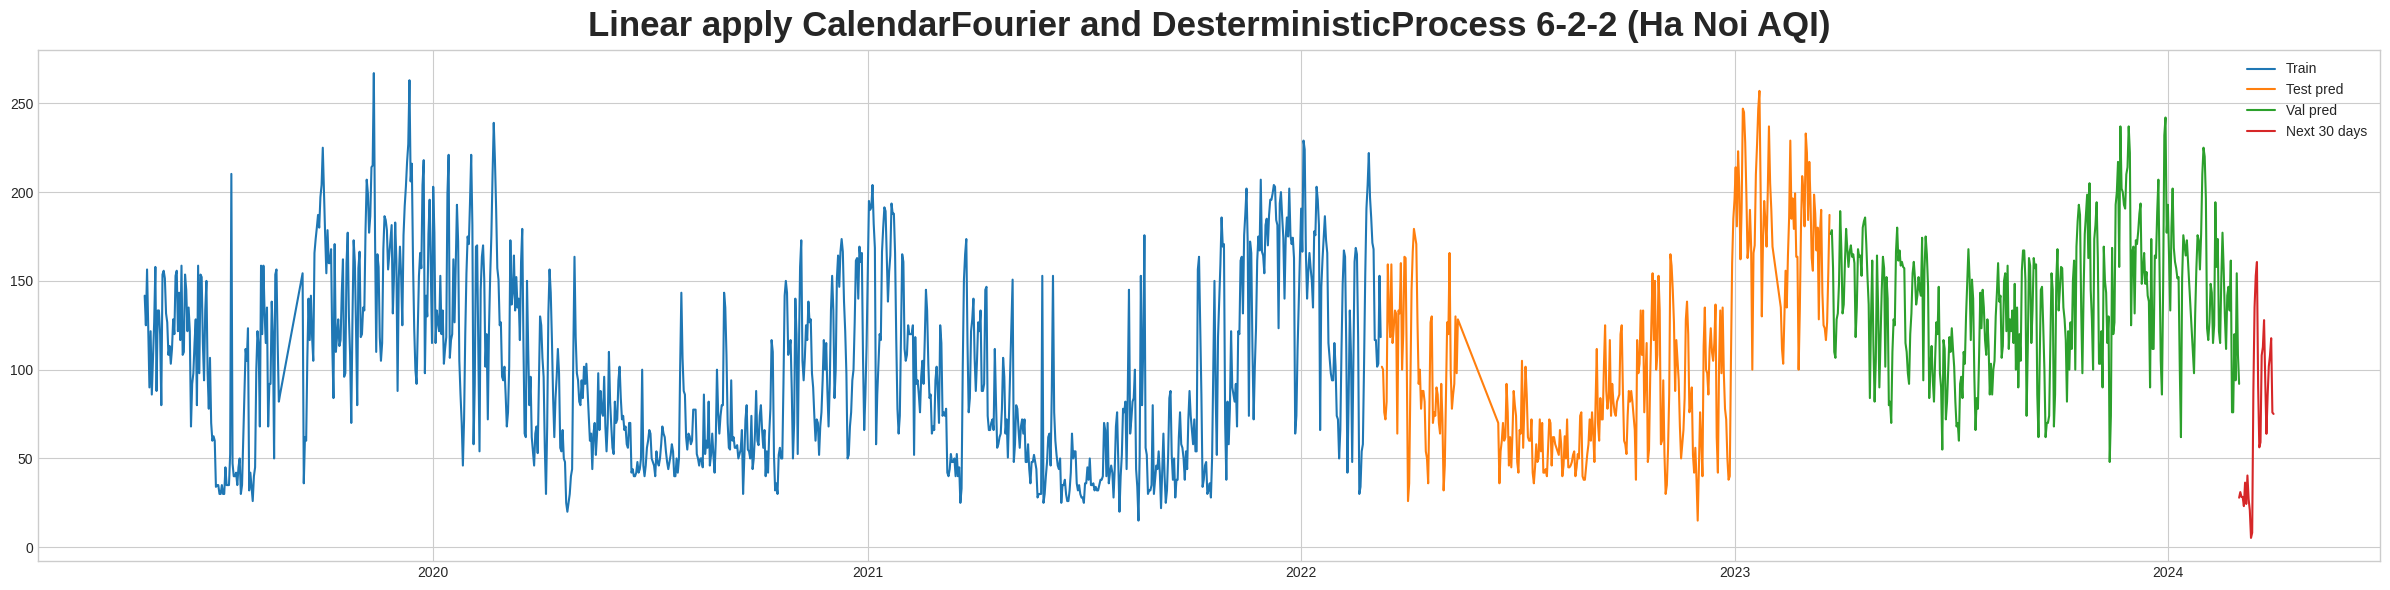

In [92]:
# Chia du lieu 6:2:2
train_size = int(0.6*len(df))
test_size = int(0.2*len(df))
val_size = len(df) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]


#Create training data
y_train = train_data
fourier = CalendarFourier(freq='A', order = 365)

dp = DeterministicProcess(
    index=y_train.index,
    constant=True,
    period = None,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)

X_train = dp.in_sample()

# Training the model
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_pred = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y_train.columns)

# -- Preparing the test data
X_test = dp.out_of_sample(steps=len(test_data))
y_test_pred = model.predict(X_test)

# -- Preparing the validate data
X_val = dp.out_of_sample(steps=len(val_data))
y_val_pred = model.predict(X_val)

# Tính toán các chỉ số đánh giá (tren tap test)
mse = mean_squared_error(test_data, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, y_test_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Du doan cho 30 ngay trong tuong lai
future_dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=30, freq='D').to_period('D')

X_future = dp.out_of_sample(steps=30)
y_next_30days = model.predict(X_future)

# Vẽ dữ liệu
plt.figure(figsize=(24, 6))
plt.plot(train_data.index.to_timestamp(), train_data)

plt.plot(test_data.index.to_timestamp(), test_data)
# plt.plot(test_data.index.to_timestamp(), y_test_pred)

plt.plot(val_data.index.to_timestamp(),val_data)
# plt.plot(val_data.index.to_timestamp(),y_val_pred)

plt.plot(future_dates.to_timestamp(), y_next_30days)
plt.legend(['Train',  'Test pred','Val pred', 'Next 30 days'])
plt.title('Linear apply CalendarFourier and DesterministicProcess 6-2-2 (Ha Noi AQI)', fontsize=25)
plt.show()

## Viet Tri ##

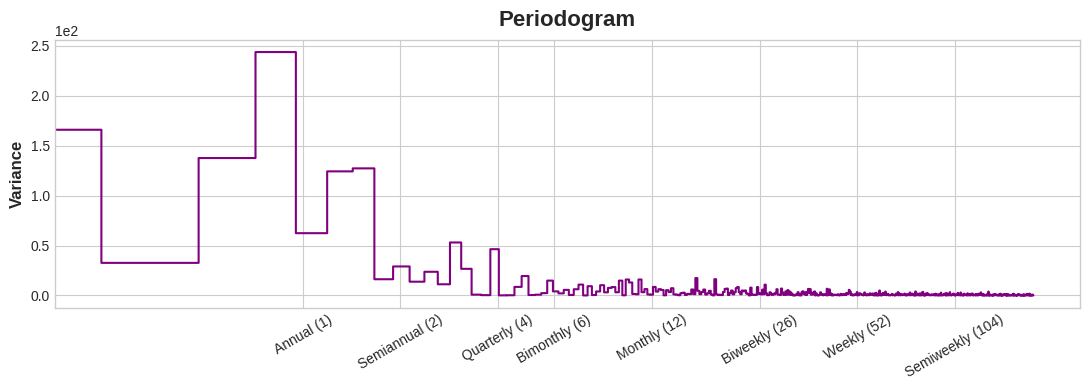

In [93]:
df = pd.read_csv('/content/drive/My Drive/Dataset_PTDLKD/AQI_VietTri_Done.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.dropna()
df = df.sort_values(by='date')
df = df.reset_index()


data = df[['date', 'AQI']]
data = data.set_index('date').to_period('D')
data.sort_index()

# data_temp = data.loc['2019']
data_temp = data
plot_periodogram(data_temp['AQI']);

MSE: 3223.028410863118
RMSE: 56.77172192969945
MAE: 43.430000412614746


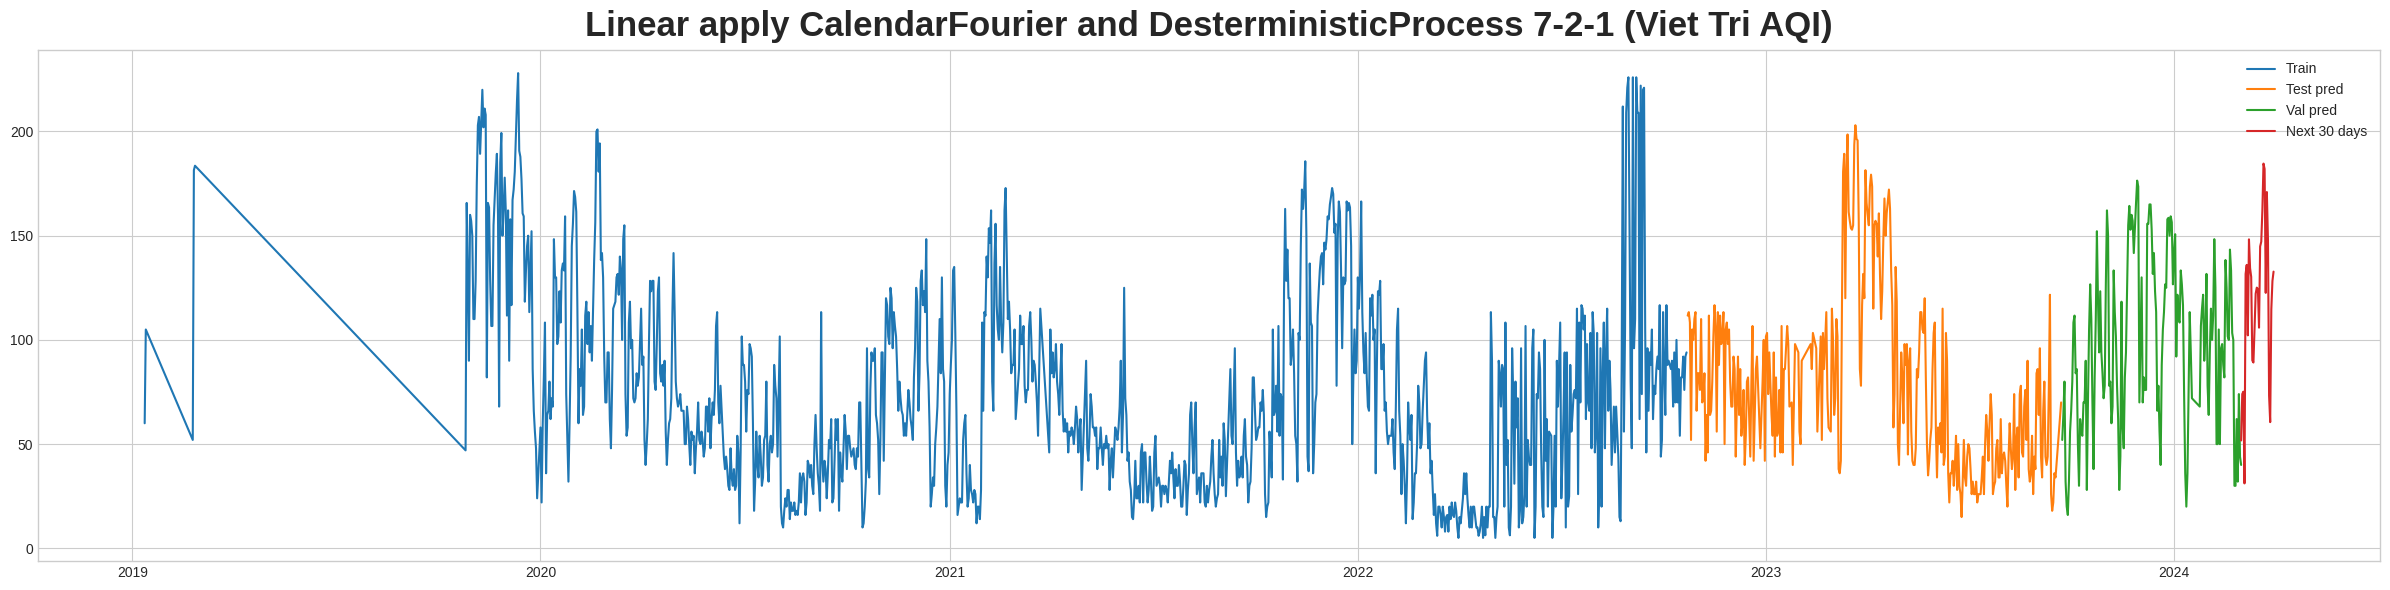

In [94]:
# Chia du lieu 7:2:1
train_size = int(0.7*len(df))
test_size = int(0.2*len(df))
val_size = len(df) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]


#Create training data
y_train = train_data
fourier = CalendarFourier(freq='A', order = 365)

dp = DeterministicProcess(
    index=y_train.index,
    constant=True,
    period = None,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)

X_train = dp.in_sample()

# Training the model
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_pred = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y_train.columns)

# -- Preparing the test data
X_test = dp.out_of_sample(steps=len(test_data))
y_test_pred = model.predict(X_test)

# -- Preparing the validate data
X_val = dp.out_of_sample(steps=len(val_data))
y_val_pred = model.predict(X_val)

# Tính toán các chỉ số đánh giá (tren tap test)
mse = mean_squared_error(test_data, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, y_test_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Du doan cho 30 ngay trong tuong lai
future_dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=30, freq='D').to_period('D')

X_future = dp.out_of_sample(steps=30)
y_next_30days = model.predict(X_future)

# Vẽ dữ liệu
plt.figure(figsize=(24, 6))
plt.plot(train_data.index.to_timestamp(), train_data)

plt.plot(test_data.index.to_timestamp(), test_data)
# plt.plot(test_data.index.to_timestamp(), y_test_pred)

plt.plot(val_data.index.to_timestamp(),val_data)
# plt.plot(val_data.index.to_timestamp(),y_val_pred)

plt.plot(future_dates.to_timestamp(), y_next_30days)
plt.legend(['Train',  'Test pred','Val pred', 'Next 30 days'])
plt.title('Linear apply CalendarFourier and DesterministicProcess 7-2-1 (Viet Tri AQI)', fontsize=25)
plt.show()

MSE: 2414.6457638932366
RMSE: 49.13904520738306
MAE: 35.661711972919946


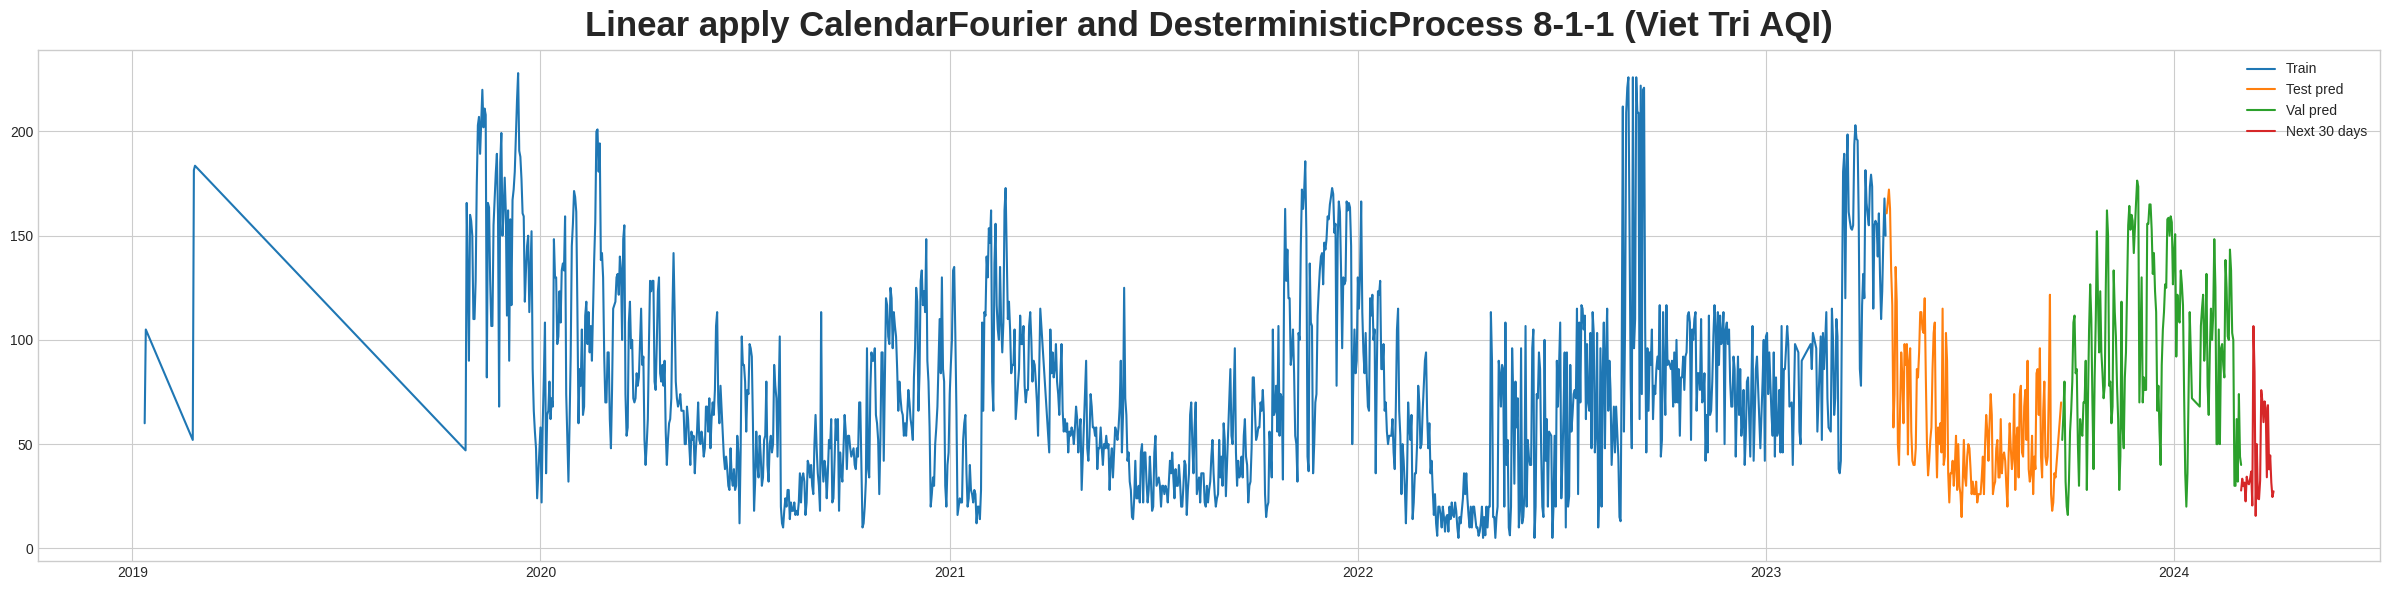

In [95]:
# Chia du lieu 8:1:1
train_size = int(0.8*len(df))
test_size = int(0.1*len(df))
val_size = len(df) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]


#Create training data
y_train = train_data
fourier = CalendarFourier(freq='A', order =365)

dp = DeterministicProcess(
    index=y_train.index,
    constant=True,
    period = None,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)

X_train = dp.in_sample()

# Training the model
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_pred = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y_train.columns)

# -- Preparing the test data
X_test = dp.out_of_sample(steps=len(test_data))
y_test_pred = model.predict(X_test)

# -- Preparing the validate data
X_val = dp.out_of_sample(steps=len(val_data))
y_val_pred = model.predict(X_val)

# Tính toán các chỉ số đánh giá (tren tap test)
mse = mean_squared_error(test_data, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, y_test_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Du doan cho 30 ngay trong tuong lai
future_dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=30, freq='D').to_period('D')

X_future = dp.out_of_sample(steps=30)
y_next_30days = model.predict(X_future)

# Vẽ dữ liệu
plt.figure(figsize=(24, 6))
plt.plot(train_data.index.to_timestamp(), train_data)

plt.plot(test_data.index.to_timestamp(), test_data)
# plt.plot(test_data.index.to_timestamp(), y_test_pred)

plt.plot(val_data.index.to_timestamp(),val_data)
# plt.plot(val_data.index.to_timestamp(),y_val_pred)

plt.plot(future_dates.to_timestamp(), y_next_30days)
plt.legend(['Train',  'Test pred','Val pred', 'Next 30 days'])
plt.title('Linear apply CalendarFourier and DesterministicProcess 8-1-1 (Viet Tri AQI)', fontsize=25)
plt.show()

MSE: 2414.6457638932366
RMSE: 49.13904520738306
MAE: 35.661711972919946


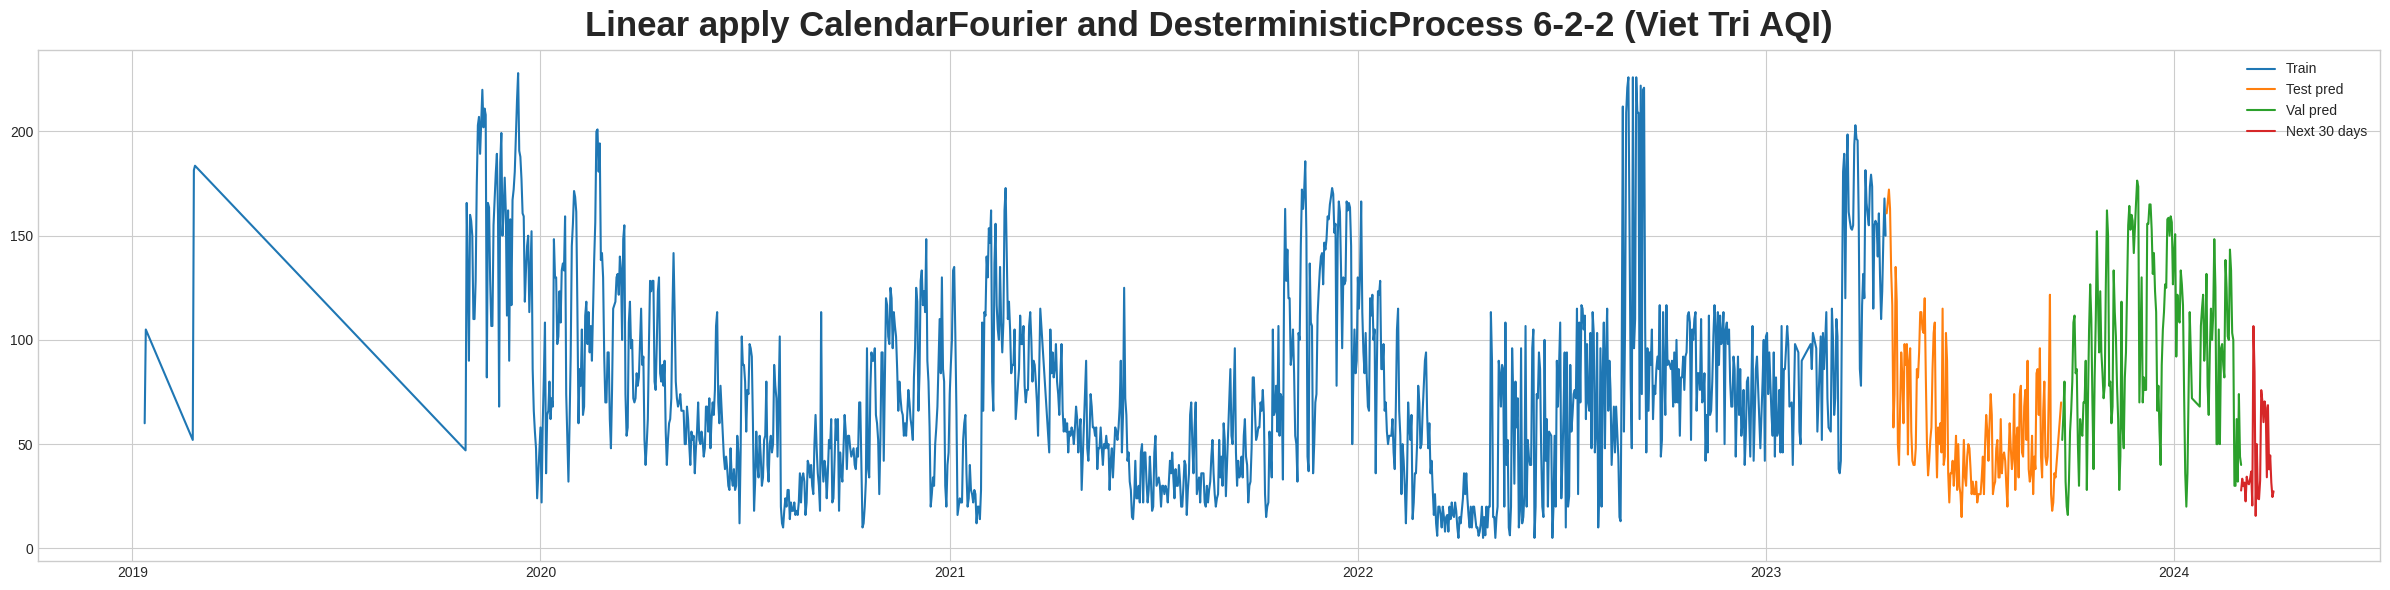

In [96]:
# Chia du lieu 6:2:2
train_size = int(0.8*len(df))
test_size = int(0.1*len(df))
val_size = len(df) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]


#Create training data
y_train = train_data
fourier = CalendarFourier(freq='A', order = 365)

dp = DeterministicProcess(
    index=y_train.index,
    constant=True,
    period = None,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)

X_train = dp.in_sample()

# Training the model
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_pred = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y_train.columns)

# -- Preparing the test data
X_test = dp.out_of_sample(steps=len(test_data))
y_test_pred = model.predict(X_test)

# -- Preparing the validate data
X_val = dp.out_of_sample(steps=len(val_data))
y_val_pred = model.predict(X_val)

# Tính toán các chỉ số đánh giá (tren tap test)
mse = mean_squared_error(test_data, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, y_test_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Du doan cho 30 ngay trong tuong lai
future_dates = pd.date_range(start=data.index[-1].to_timestamp(), periods=30, freq='D').to_period('D')

X_future = dp.out_of_sample(steps=30)
y_next_30days = model.predict(X_future)

# Vẽ dữ liệu
plt.figure(figsize=(24, 6))
plt.plot(train_data.index.to_timestamp(), train_data)

plt.plot(test_data.index.to_timestamp(), test_data)
# plt.plot(test_data.index.to_timestamp(), y_test_pred)

plt.plot(val_data.index.to_timestamp(),val_data)
# plt.plot(val_data.index.to_timestamp(),y_val_pred)

plt.plot(future_dates.to_timestamp(), y_next_30days)
plt.legend(['Train',  'Test pred','Val pred', 'Next 30 days'])
plt.title('Linear apply CalendarFourier and DesterministicProcess 6-2-2 (Viet Tri AQI)', fontsize=25)
plt.show()